In [ ]:
pip install pandas

**Extract PRs that have the type refactor**

In [2]:
import pandas as pd
from google.colab import files


all_pr_df = pd.read_parquet("hf://datasets/hao-li/AIDev/all_pull_request.parquet")
pr_task_type_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_task_type.parquet")

merged_df = pd.merge(all_pr_df, pr_task_type_df, on='id', how='inner')
print(f"Total PRs after merge (labeled only): {len(merged_df)}")

print(f"Total PRs with type 'refactor': {len(merged_df)}")

refactor_prs = merged_df[merged_df['type'].str.lower() == 'refactor']
print(f"Total PRs with type 'refactor': {len(refactor_prs)}")

unique_refactor_count = refactor_prs['id'].nunique()
print(f"Total UNIQUE refactor PRs: {unique_refactor_count}")

refactor_prs.to_csv("refactor_prs_only.csv", index=False)
files.download("refactor_prs_only.csv")


Total PRs after merge (labeled only): 33596
Total PRs with type 'refactor': 33596
Total PRs with type 'refactor': 2288
Total UNIQUE refactor PRs: 2288


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

***Bar chart PRs per agent***

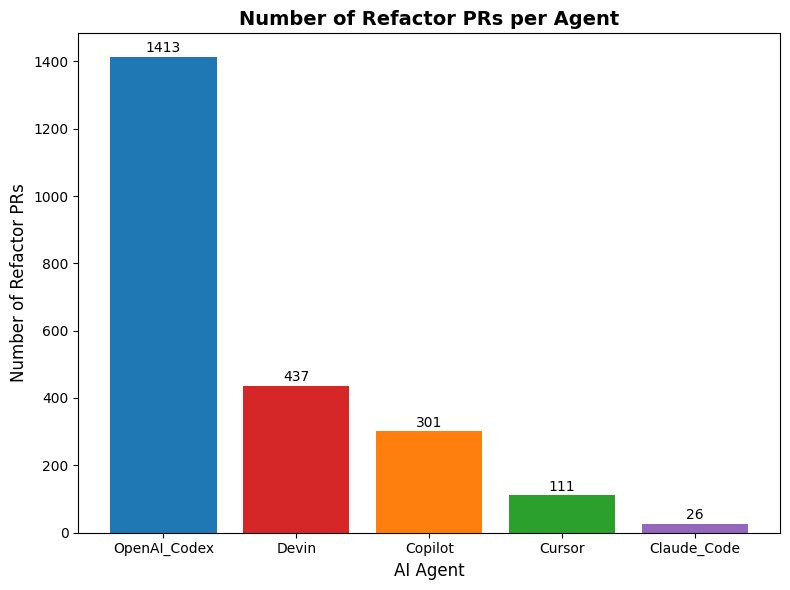

In [3]:
import pandas as pd
import matplotlib.pyplot as plt



agent_col = 'agent_x' if 'agent_x' in refactor_prs.columns else 'agent'

agent_counts = refactor_prs[agent_col].value_counts().reset_index()
agent_counts.columns = ['Agent', 'PR Count']

agent_colors = {
    'OpenAI_Codex': '#1f77b4',
    'Copilot': '#ff7f0e',
    'Cursor': '#2ca02c',
    'Devin': '#d62728',
    'Claude_Code': '#9467bd'
}

plt.figure(figsize=(8, 6))
bars = plt.bar(agent_counts['Agent'], agent_counts['PR Count'],
               color=[agent_colors.get(a, '#999999') for a in agent_counts['Agent']])

plt.title("Number of Refactor PRs per Agent", fontsize=14, fontweight='bold')
plt.xlabel("AI Agent", fontsize=12)
plt.ylabel("Number of Refactor PRs", fontsize=12)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5,
             f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
